In [1]:
# Importing modules.

%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor


In [2]:
# Importing data set
# Drop NA value
df = pd.read_csv('abalone.csv')
df=df.dropna()
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# Converted categorical variables into dummy variables with get_dummies
sex_dummy = pd.get_dummies(df['Sex'])
new_set=pd.concat([df,sex_dummy],axis=1)

In [5]:
# Dropped the transformed categorical variables above.
del new_set['Sex']

In [6]:
new_set

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [11]:
# Dropped the "Rings" variable 
del new_set["M"]
X  = new_set.drop('Rings',axis=1)
y = df['Rings']

In [14]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
# Create a regressor object 
regressor= DecisionTreeRegressor(random_state=0)
# Fit train data.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

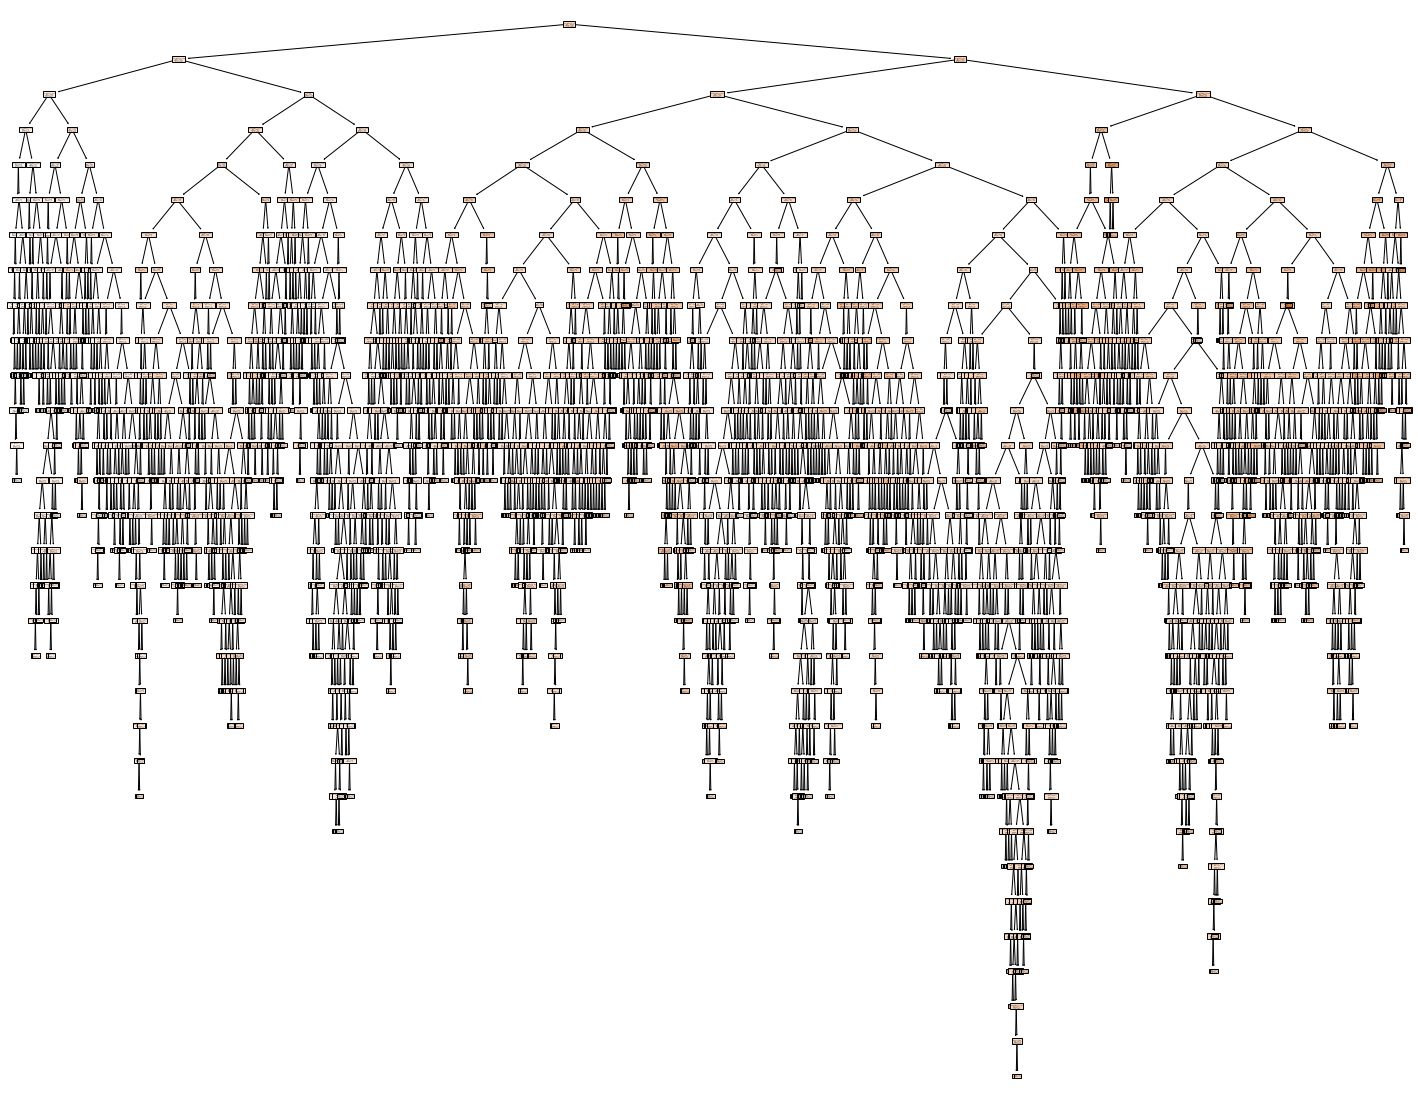

In [16]:
# Plotted decision tree without and penalty restriction
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','F','I'], filled=True)

In [17]:
# Predicting response values of our test data by using previous decision tree as our predictor
y_pred = regressor.predict(X_test)
y_pred

array([ 9.,  8.,  8., 11., 11.,  6., 11., 13., 16.,  9., 10.,  4., 11.,
       10.,  6.,  8., 15., 11., 12., 10.,  8., 12.,  6., 16., 10., 10.,
       14., 17., 10., 10., 13.,  8., 11.,  9.,  8.,  8., 10., 16., 15.,
       11., 10., 10., 17., 11.,  8.,  7., 11.,  8., 11., 11.,  8., 21.,
       10.,  6., 15., 12.,  8., 11.,  8.,  6.,  7., 10., 11., 10., 11.,
        8., 10., 10.,  9.,  7.,  9., 10.,  5.,  8.,  8.,  8., 12., 11.,
        8., 13.,  8., 10., 14., 14.,  8.,  7.,  9.,  9., 10.,  8., 15.,
        8.,  8., 11.,  7., 10., 12., 11.,  6., 13.,  9., 10.,  8.,  8.,
       19.,  6.,  9.,  9.,  9.,  8.,  7.,  9.,  8.,  7.,  8., 10.,  6.,
        7.,  9., 10.,  9., 10.,  8., 20., 10.,  9., 13., 15.,  7.,  9.,
        7.,  6.,  8.,  7.,  9.,  9., 10., 15.,  6., 10., 11., 10., 15.,
       17.,  8., 11.,  8., 11.,  9.,  9., 10.,  8.,  9., 10.,  8.,  8.,
       13., 10.,  7., 15., 10.,  9., 18.,  5.,  7., 10., 14., 12., 14.,
       17.,  6., 19., 10.,  7.,  8., 14., 11., 11.,  6., 14.,  9

In [18]:
# Comparing our predicted y values with their actual value
comp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp

,Actual,Predicted
17,10,9.0
1131,8,8.0
299,9,8.0
1338,10,11.0
2383,16,11.0
...,...,...
1787,8,8.0
3075,11,11.0
2766,8,9.0
1410,10,9.0


In [21]:
# There is test MSE of y values predicted by decision tree without penalty
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 8.845693779904305


In [22]:
# Instead of manually testing alpha values, we define a specific alpha range / values. 
# Errors will be calculated using the cross validation method using these alphas (Below).
path = regressor.cost_complexity_pruning_path(X_train, y_train)


In [23]:
# Cross validation method is applied to find the best alpha. 
# For each alpha value, 10 different cross validation will be calculated in the training set.

cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=i)
        regressor.fit(X_trainp, y_trainp)
        y_pred=regressor.predict(X_valid)
        CVErrors.append([i,mean_squared_error(y_trainp, regressor.predict(X_trainp)),mean_squared_error(y_valid, y_pred)])
df = pd.DataFrame(CVErrors,columns=['alpha','Training Error','Validation Error'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
print(kfoldCV_by_alpha)

        alpha  Training Error  Validation Error
0    0.000000        0.000000          9.045824
1    0.000100        0.000029          9.045831
2    0.000112        0.000583          9.045465
3    0.000120        0.000583          9.045465
4    0.000120        0.000583          9.045465
..        ...             ...               ...
847  0.152122        5.712058          6.184300
848  0.216815        6.165327          6.540711
849  0.403498        6.647596          6.779077
850  0.661640        7.283669          7.464090
851  2.979621        9.025882          9.324684

[852 rows x 3 columns]


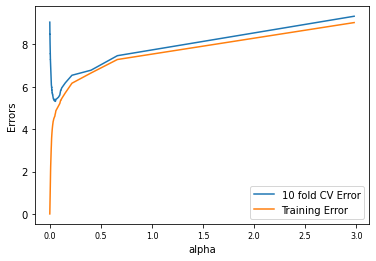

In [24]:
# It will draw the errors, to see the differences between training and validation error. 
# Alpha values are on the x-axis.
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_alpha['alpha'].values,kfoldCV_by_alpha['Validation Error'].values,label = '10 fold CV Error')
ax.plot(kfoldCV_by_alpha['alpha'].values,kfoldCV_by_alpha['Training Error'].values,label = 'Training Error')
ax.set_xlabel('alpha')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [26]:
# Sort values by validation errors to see best Alpha.
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Error'],ascending=True)
kfoldCV_by_alpha

,alpha,Training Error,Validation Error
838,0.051696,4.683238,5.308706
840,0.055785,4.758936,5.316385
839,0.055161,4.736689,5.317213
834,0.042595,4.538400,5.346473
835,0.047069,4.587810,5.369690
...,...,...,...
2,0.000112,0.000583,9.045465
3,0.000120,0.000583,9.045465
0,0.000000,0.000000,9.045824
1,0.000100,0.000029,9.045831


Mean Squared Error: 5.853704206937116


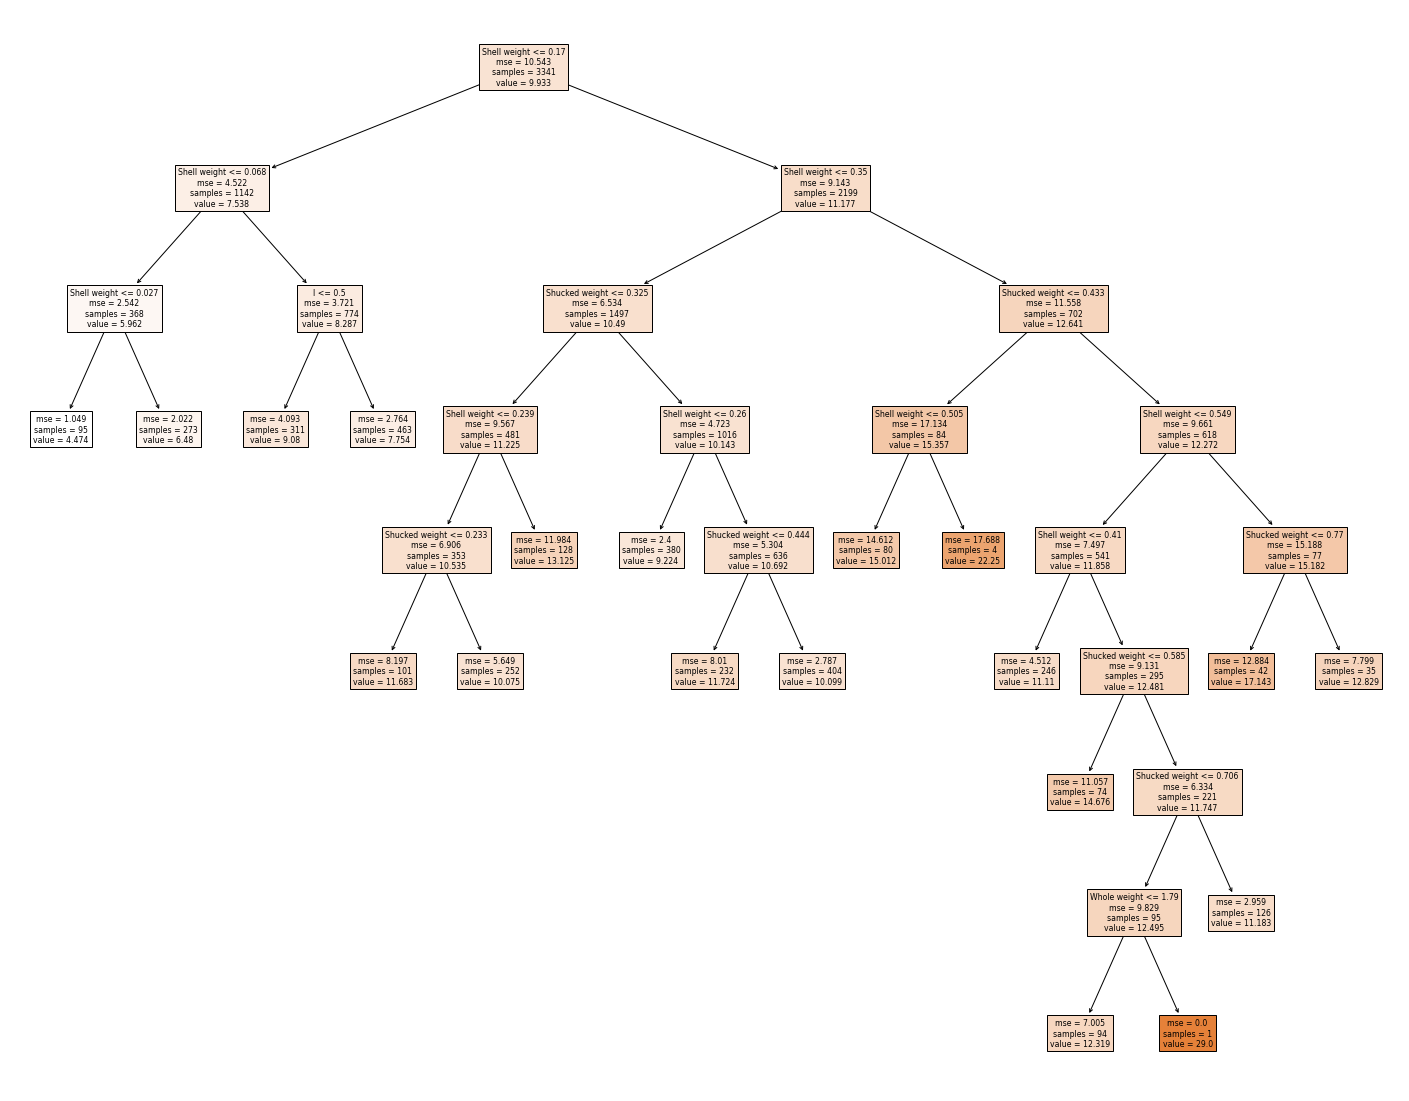

In [28]:
# Now we are gonna use alpha value with the least validation error to construct our decision tree.
# Alpha value should be 0.051696.
# Compute MSE
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.051696)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','F','I'], filled=True)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

In [29]:
# We tried BaggingRegressor to obtain lower MSE
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
y_model_pred=model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_model_pred))

MSE:  4.934294258373207


In [30]:
# Compared different number of trees with their MSE’s
MSE=[]
for i in np.linspace(start = 50, stop = 500, num = 10):
    regressor = RandomForestRegressor(n_estimators = int(i), random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    MSE.append([i,np.array(mean_squared_error(y_test, y_pred))])
df = pd.DataFrame(MSE,columns=['Number_of_Trees','MSE'])
df

,Number_of_Trees,MSE
0,50.0,4.769601913875598
1,100.0,4.704409569377991
2,150.0,4.682525677830941
3,200.0,4.664818690191388
4,250.0,4.673507846889953
5,300.0,4.670682243487507
6,350.0,4.657835465286593
7,400.0,4.641322876794258
8,450.0,4.6361405930651545
9,500.0,4.632328846889952


In [31]:
# With the lowest MSE we used 500 estimators
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 4.632328846889952


In [33]:
regressor=RandomForestRegressor(random_state=0)
# Number of trees in random forest
n_estimators = [50,100,200,300,400,500]
# Number of features at every split
max_features = [1,2,3,4,5,6,7,8,9]
# Create grid params dict.
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params
# Grid search of parameters
regressor_grid = GridSearchCV(estimator = regressor, param_grid = params, 
                                cv = 5, verbose=0, scoring='neg_mean_squared_error',n_jobs = -1)
# Fit the model
regressor_grid.fit(X_train, y_train)
# Print results
print(regressor_grid.best_params_)

{'max_features': 2, 'n_estimators': 200}


In [34]:
# From grid search, obtained best max_features: 2, and best n_estimators: 200
regressor=RandomForestRegressor(random_state=0,n_estimators=200,max_features=2)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  4.562220305023923


Text(0, 0.5, 'Method')

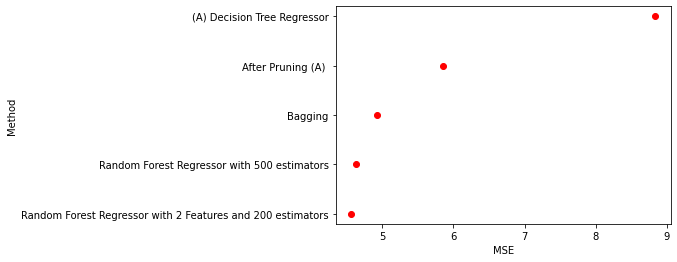

In [35]:
# SUMMARIZE
# It will draw the MSE, to see the differences between methods. 
# MSE values are on the x-axis.
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot([4.56,4.63,4.93,5.85,8.84], ["Random Forest Regressor with 2 Features and 200 estimators","Random Forest Regressor with 500 estimators","Bagging","After Pruning (A) ","(A) Decision Tree Regressor"],'ro')
ax.set_xlabel('MSE')
ax.set_ylabel('Method')

<AxesSubplot:>

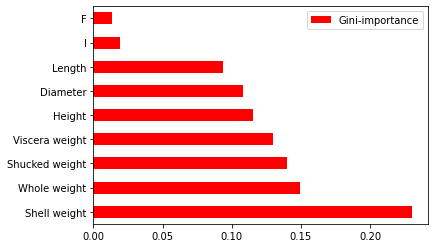

In [36]:
# Plot the impurity-based feature importances of the forest
feats = {} # A dict to hold feature_name: feature_importance
importances = regressor.feature_importances_
for feature, importance in zip(X.columns, regressor.feature_importances_):
    feats[feature] = importance # Add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.plot.barh(color='r')